In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the data
results = pd.read_csv('/Users/neeleshkarthikeyan/d2i/cyberinfrastructure-knowledge-network/plugins/power_monitoring/server/qoe_predictive.csv')
results.columns = ['server_id', 'service_id', 'client_id', 'prediction', 'compute_time', 'pred_accuracy',
                   'total_qoe', 'accuracy_qoe', 'delay_qoe', 'req_acc', 'req_delay', 'model',
                   'added_time', 'timestamp', 'accuracy', 'ground_truth']

# Convert timestamp to datetime
results['timestamp'] = pd.to_datetime(results['timestamp'])
results

,server_id,service_id,client_id,prediction,compute_time,pred_accuracy,total_qoe,accuracy_qoe,delay_qoe,req_acc,req_delay,model,added_time,timestamp,accuracy,ground_truth
0,EDGE-1,imagenet_image_classification,raspi-1,abaya,1.660303,0.999431,0.515057,1.000000,0.030115,0.849,0.050,550e8400-e29b-41d4-a716-446655440000,03-04-2023 15:13:05,2024-09-27 18:41:42.145,1,abaya
1,EDGE-1,imagenet_image_classification,raspi-1,crutch,1.832906,0.487761,0.301103,0.573836,0.028370,0.850,0.052,550e8400-e29b-41d4-a716-446655440000,03-04-2023 15:13:05,2024-09-27 18:41:43.998,0,academic_gown
2,EDGE-1,imagenet_image_classification,raspi-1,accordion,1.695716,0.943654,0.514743,1.000000,0.029486,0.851,0.050,550e8400-e29b-41d4-a716-446655440000,03-04-2023 15:13:05,2024-09-27 18:41:45.949,1,accordion
3,EDGE-1,imagenet_image_classification,raspi-1,acorn,1.811078,0.999717,0.513804,1.000000,0.027608,0.849,0.050,550e8400-e29b-41d4-a716-446655440000,03-04-2023 15:13:05,2024-09-27 18:41:47.757,1,acorn
4,EDGE-1,imagenet_image_classification,raspi-1,acorn_squash,1.807058,0.987295,0.513835,1.000000,0.027669,0.849,0.050,550e8400-e29b-41d4-a716-446655440000,03-04-2023 15:13:05,2024-09-27 18:41:49.729,1,acorn_squash
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,EDGE-1,imagenet_image_classification,raspi-2,sidewinder,1.710143,0.481256,0.352035,0.686528,0.017542,0.701,0.030,550e8400-e29b-41d4-a716-446655440000,03-04-2023 15:19:05,2024-09-27 19:40:26.019,1,sidewinder
3954,EDGE-1,imagenet_image_classification,raspi-2,silky_terrier,1.778963,0.946902,0.508432,1.000000,0.016864,0.701,0.030,550e8400-e29b-41d4-a716-446655440000,03-04-2023 15:19:05,2024-09-27 19:40:27.915,1,silky_terrier
3955,EDGE-1,imagenet_image_classification,raspi-2,ski,1.730268,0.997821,0.508669,1.000000,0.017338,0.698,0.030,550e8400-e29b-41d4-a716-446655440000,03-04-2023 15:19:05,2024-09-27 19:40:30.011,1,ski
3956,EDGE-1,imagenet_image_classification,raspi-2,ski_mask,1.797202,0.994809,0.508625,1.000000,0.017249,0.700,0.031,550e8400-e29b-41d4-a716-446655440000,03-04-2023 15:19:05,2024-09-27 19:40:31.906,1,ski_mask


In [10]:
power = pd.read_csv('/Users/neeleshkarthikeyan/d2i/cyberinfrastructure-knowledge-network/plugins/power_monitoring/server/power.csv')
power.columns = ['timestamp', 'container_power', 'container_cpu_usage', 'container_memory_usage', 'cpu_power', 'gpu_power', 'tot_power']

# Convert timestamp to datetime
power['timestamp'] = pd.to_datetime(power['timestamp'])
power

,timestamp,container_power,container_cpu_usage,container_memory_usage,cpu_power,gpu_power,tot_power
0,2024-09-27 18:24:28,96476.95,97.55,225338982,989,82,2720
1,2024-09-27 18:24:33,41891.78,40.99,473327206,1022,286,3358
2,2024-09-27 18:24:38,120767.39,101.23,474585497,1193,41,2921
3,2024-09-27 18:24:42,84726.24,53.22,475843788,1592,0,3230
4,2024-09-27 18:24:47,129627.40,74.20,566860185,1747,81,3744
...,...,...,...,...,...,...,...
946,2024-09-27 19:40:25,1347241.28,376.64,961439334,3577,120,5402
947,2024-09-27 19:40:30,1267799.50,388.30,961753907,3265,0,5169
948,2024-09-27 19:40:34,1241987.35,372.41,961544192,3335,362,5555
949,2024-09-27 19:40:39,1170875.68,331.13,961124761,3536,120,5443


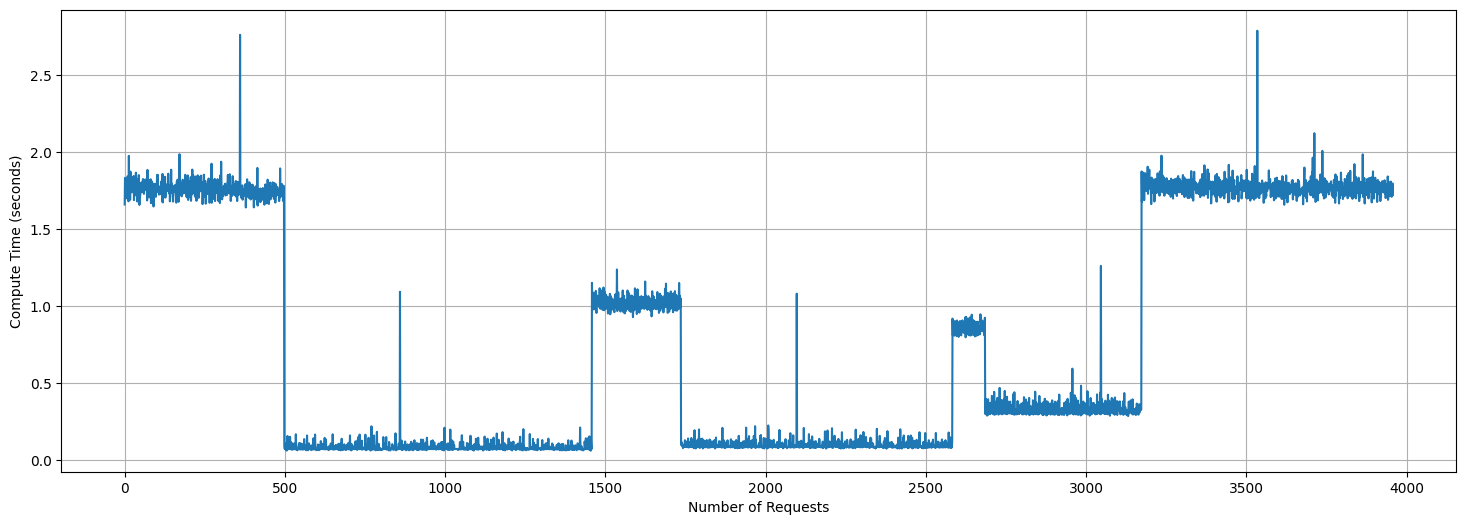

In [13]:
plt.figure(figsize=(18, 6))
plt.plot(results['compute_time'])
plt.xlabel('Number of Requests')
plt.ylabel('Compute Time (seconds)')
plt.grid(True)
plt.show()

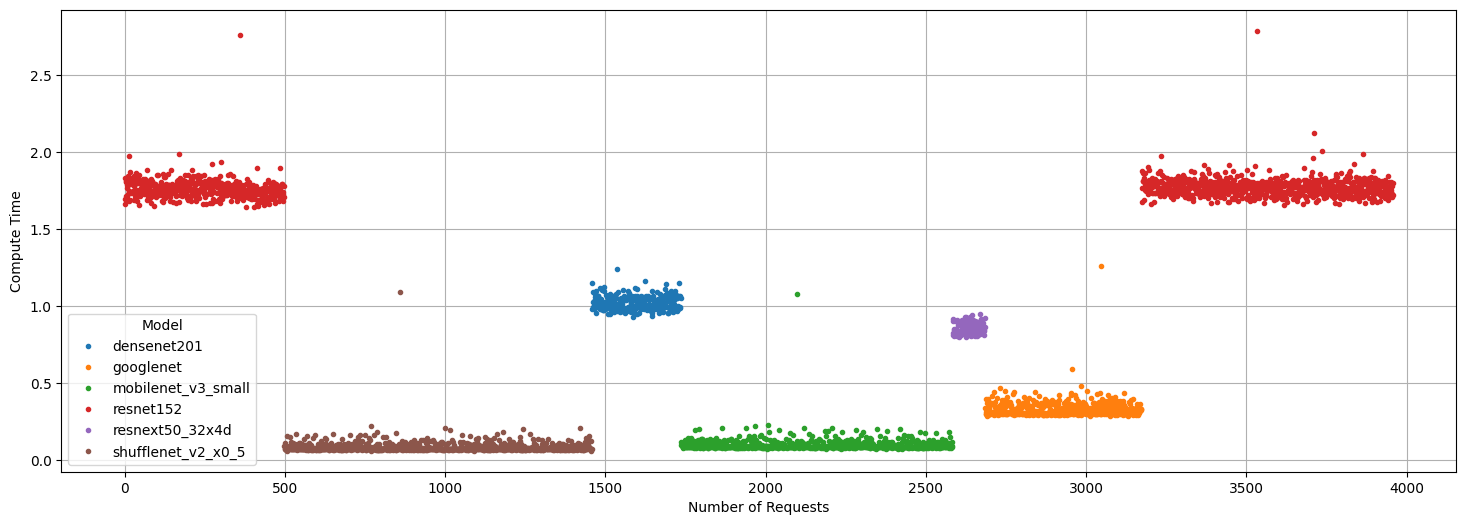

In [14]:
# Define the model mapping
model_mapping = {
    "550e8400-e29b-41d4-a716-446655440000": "resnet152",
    "550e8400-e29b-41d4-a716-446655440001": "shufflenet_v2_x0_5",
    "550e8400-e29b-41d4-a716-446655440002": "densenet201",
    "550e8400-e29b-41d4-a716-446655440003": "mobilenet_v3_small",
    "550e8400-e29b-41d4-a716-446655440004": "resnext50_32x4d",
    "550e8400-e29b-41d4-a716-446655440005": "googlenet"
}

# Replace model IDs with names
results['model'] = results['model'].replace(model_mapping)

# Plot the data with different colors for each model
plt.figure(figsize=(18, 6))

# Group by model and plot each group separately
for model, group in results.groupby('model'):
    plt.plot(group['compute_time'], marker='.', linestyle='', label=model)

plt.xlabel('Number of Requests')
plt.ylabel('Compute Time')

plt.grid(True)
plt.legend(title='Model')
plt.show()

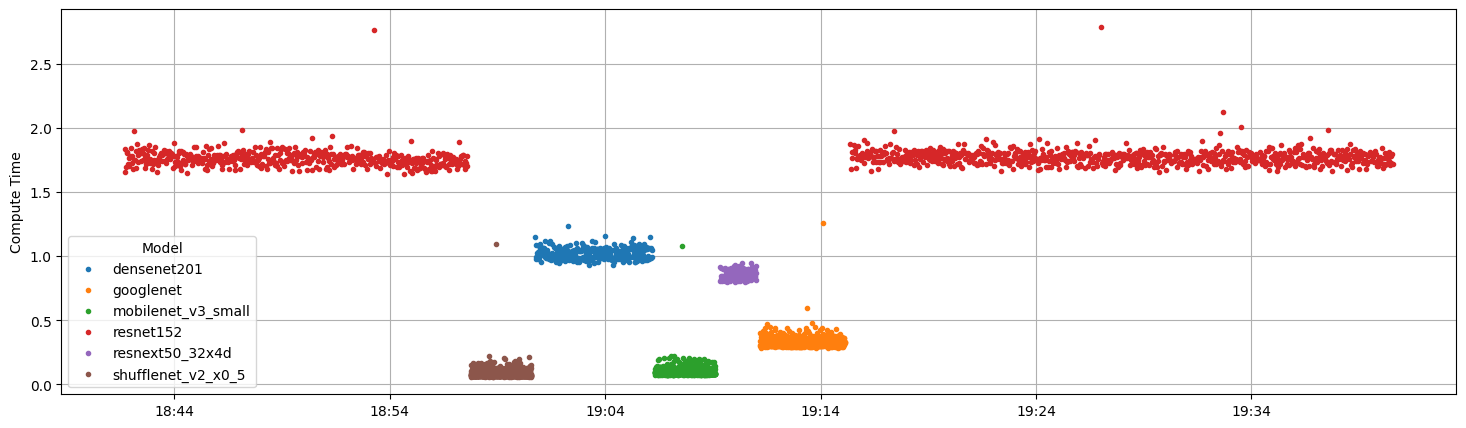

In [15]:
# Define the model mapping
model_mapping = {
    "550e8400-e29b-41d4-a716-446655440000": "resnet152",
    "550e8400-e29b-41d4-a716-446655440001": "shufflenet_v2_x0_5",
    "550e8400-e29b-41d4-a716-446655440002": "densenet201",
    "550e8400-e29b-41d4-a716-446655440003": "mobilenet_v3_small",
    "550e8400-e29b-41d4-a716-446655440004": "resnext50_32x4d",
    "550e8400-e29b-41d4-a716-446655440005": "googlenet"
}

# Replace model IDs with names
results['model'] = results['model'].replace(model_mapping)

# Plot the data with different colors for each model
plt.figure(figsize=(18, 5))

# Group by model and plot each group separately
for model, group in results.groupby('model'):
    plt.plot(group['timestamp'], group['compute_time'], marker='.', linestyle='', label=model)

plt.ylabel('Compute Time')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
plt.grid(True)
plt.legend(title='Model')
plt.show()

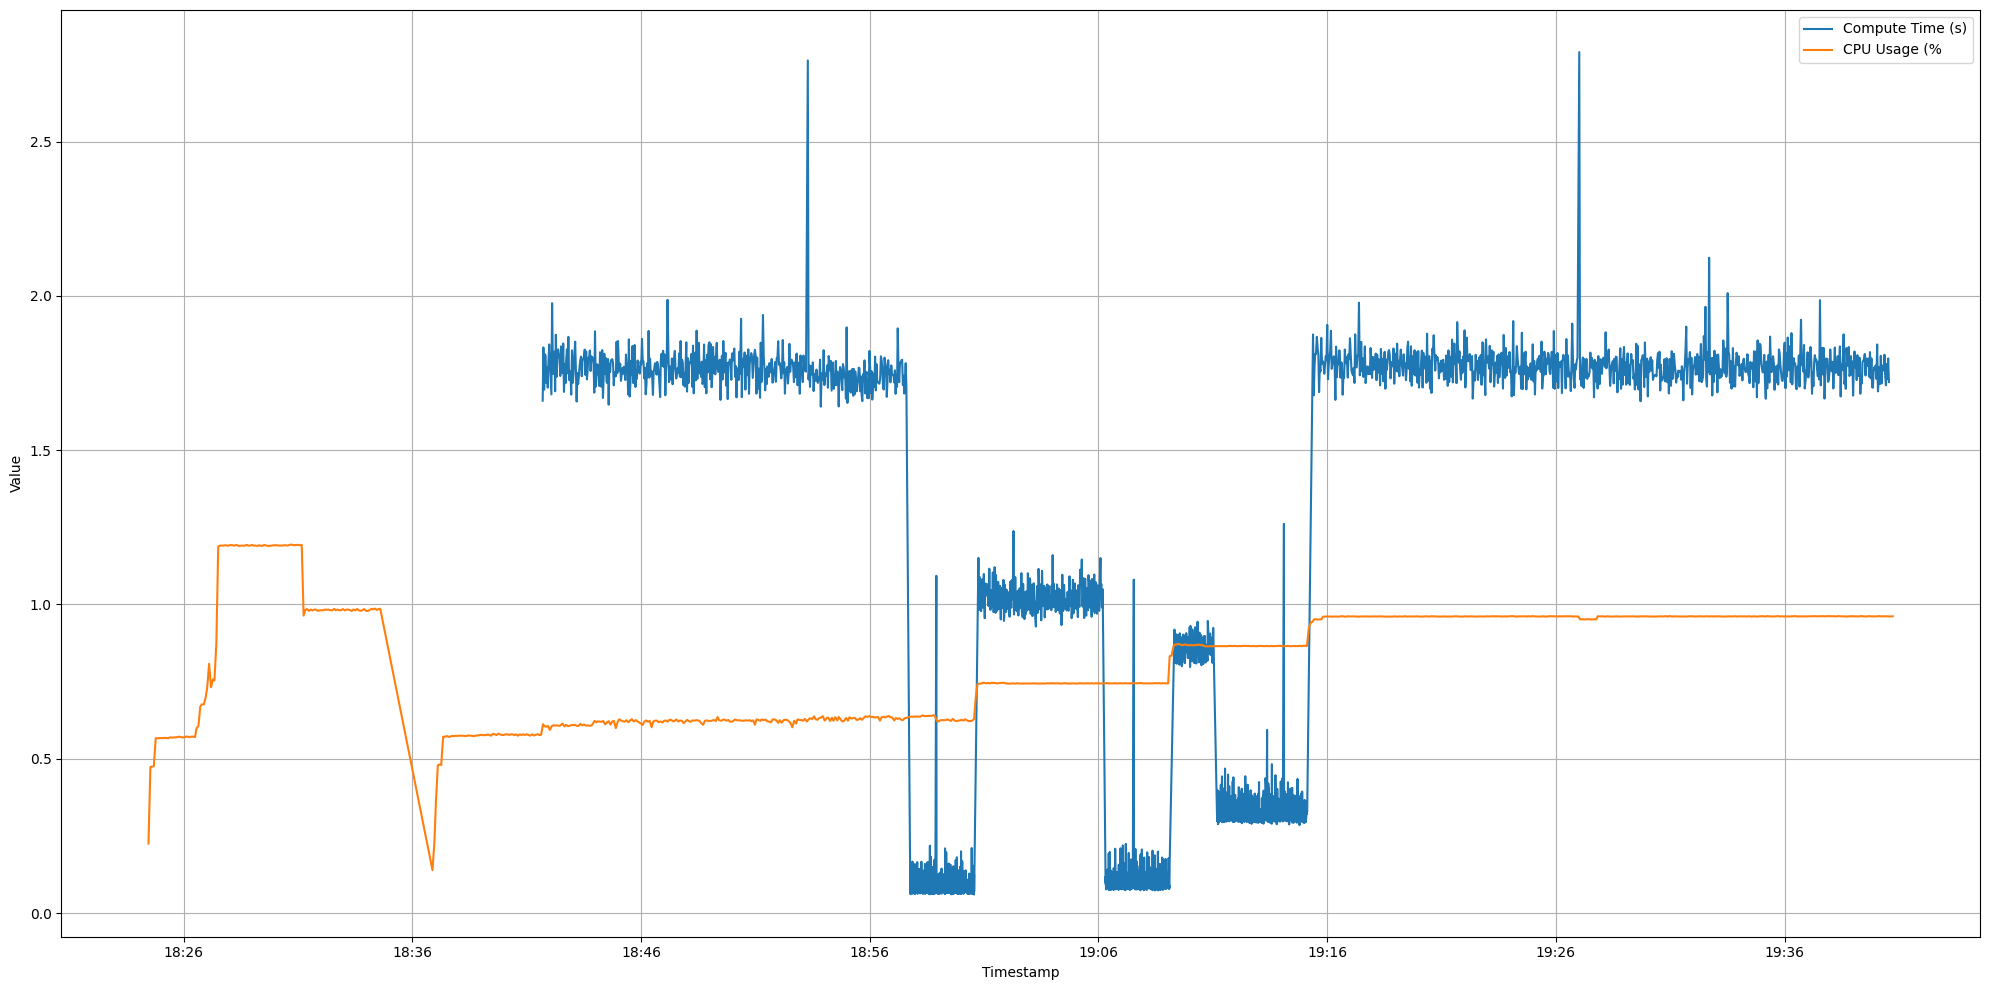

In [25]:
# Plot the data
plt.style.use('default')
plt.figure(figsize=(20, 10), facecolor='white')
plt.plot(results['timestamp'], results['compute_time'], label='Compute Time (s)')
plt.plot(power['timestamp'], power['container_memory_usage']/1e9, label='CPU Usage (%')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
plt.tight_layout()
plt.show()

In [28]:
results.groupby('model')['accuracy'].mean()

model
densenet201           0.902878
googlenet             0.776639
mobilenet_v3_small    0.815821
resnet152             0.908028
resnext50_32x4d       0.960784
shufflenet_v2_x0_5    0.708333
Name: accuracy, dtype: float64